In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import simulations as nb

from src import sim, timescale_utils

# set notebook defaults
np.set_printoptions(precision=2)

random_seed = 1
n_regions, n_timepoints = 1, 1200
sampling_rate = 1 / 0.75

# initialize estimators
ols = timescale_utils.OLS(n_jobs=-2)
nls = timescale_utils.NLS(n_jobs=-2)


**estimating timescales: ols vs nls**

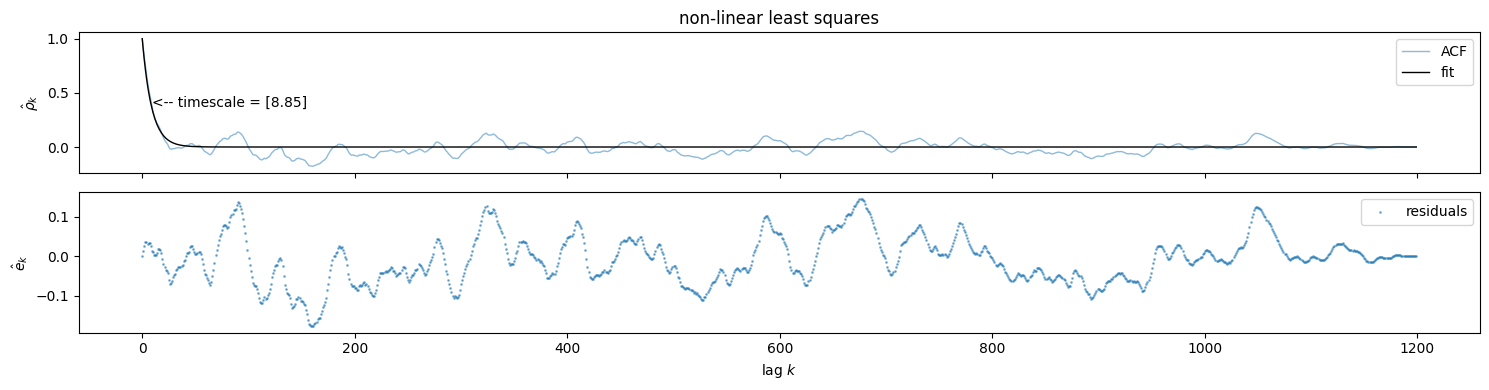

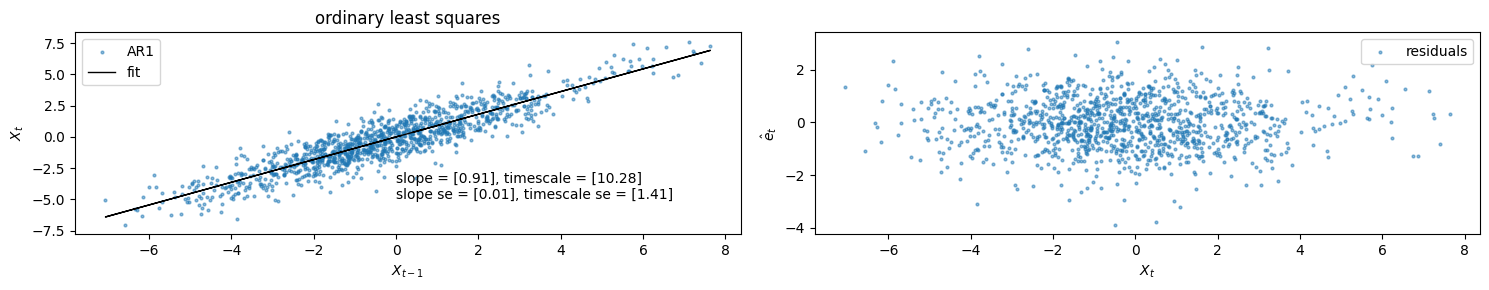

In [2]:
X = sim.sim_ar([0.9], n_timepoints)  # AR(1)

nls_ = nls.fit(X, n_timepoints)
ols_ = ols.fit(X, n_timepoints)
nb.plot_nls_vs_ols(X, n_timepoints, nls_, ols_)

**simulation of AR(1) and AR(2) processes**

In [3]:
# !! 20sec runtime !!

n_timepoints, n_repeats = 4800, 1000

# AR(1)
ar1_phis = np.array([0.9, 0.7, 0.5, 0.3, 0.1])
ar1_taus = -1 / np.log(ar1_phis)
ar1_estimates_ = nb.mc_simulation(ar1_phis, n_timepoints, random_seed=0)

# AR(2)
ar2_phis = np.stack([ar1_phis, (0.5 - 0.5 * ar1_phis)], axis=-1)
ar21_phis = ar2_phis[:, 0] / (1 - ar2_phis[:, 1])
ar21_taus = -1 / np.log(ar21_phis)
ar2_estimates_ = nb.mc_simulation(ar2_phis, n_timepoints)

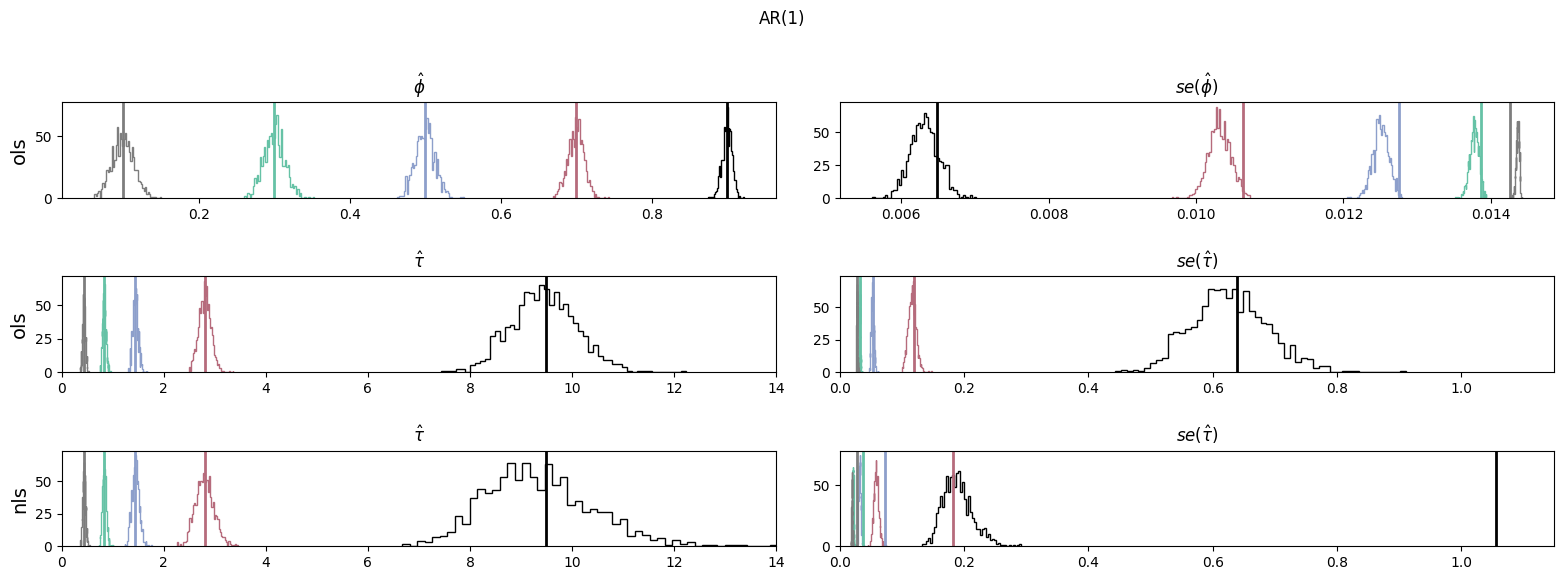

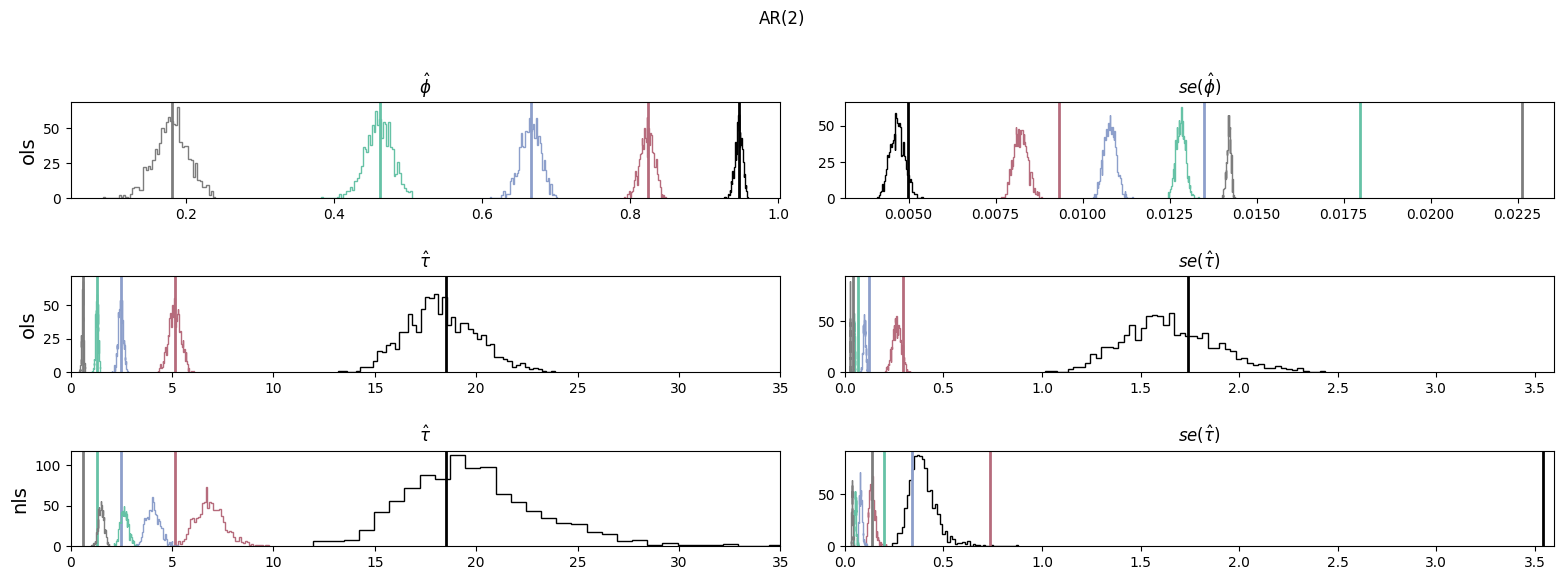

In [4]:
nb.plot_simulation(ar1_estimates_, ar1_phis, ar1_taus, [0, 14], [0, 1.15], "AR(1)")
nb.plot_simulation(ar2_estimates_, ar21_phis, ar21_taus, [0, 35], [0, 3.6], "AR(2)")